# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

In [3]:
#1 
fraud_counts = fraud['fraud'].value_counts() 
print(fraud_counts)

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64


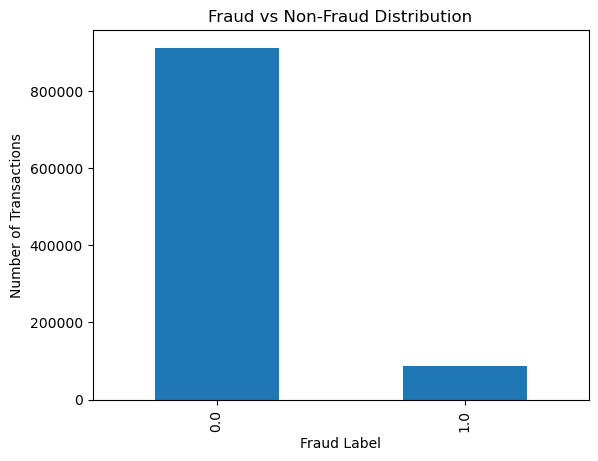

In [5]:
import matplotlib.pyplot as plt
fraud_counts.plot(kind='bar', title='Fraud vs Non-Fraud Distribution')
plt.xlabel('Fraud Label')
plt.ylabel('Number of Transactions')
plt.show()

In [ ]:
# With only 8.7% fraudulent transactions, this is a highly imbalanced dataset.

In [ ]:
#2 Train a LogisticRegression

In [7]:
X = fraud.drop('fraud', axis=1)
y = fraud['fraud']


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    solver='lbfgs')

model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182519
         1.0       0.58      0.95      0.72     17481

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000

[[170381  12138]
 [   910  16571]]


In [ ]:
# 3 - Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric 

In [11]:
# Generate predictions 
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]   


In [12]:
# Classification report 
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182519
         1.0       0.58      0.95      0.72     17481

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



In [13]:
# Confusion matrix 
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))


[[170381  12138]
 [   910  16571]]


In [14]:
# ROC‑AUC 
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC:", roc_auc)


ROC-AUC: 0.9795338853517997


In [16]:
# Precision–Recall AUC (important) 
from sklearn.metrics import average_precision_score

pr_auc = average_precision_score(y_test, y_proba)
print("PR-AUC:", pr_auc)


PR-AUC: 0.7572772125105205


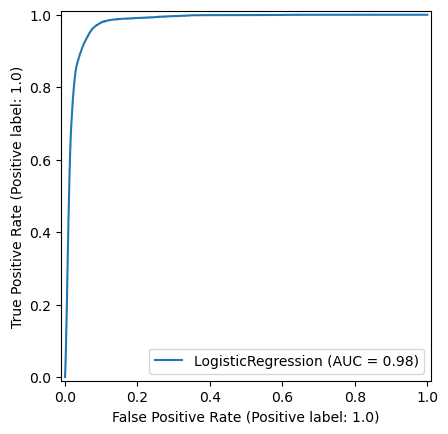

In [17]:
# plots 
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()


In [ ]:
# The Logistic Regression model performs very well at detecting fraud, but at the cost of generating a significant number of false positives. 

In [ ]:
# 4 Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model?  

In [18]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)


In [19]:
model_ros = LogisticRegression(max_iter=1000, solver='lbfgs')
model_ros.fit(X_resampled, y_resampled)


LogisticRegression(max_iter=1000)

In [20]:
y_pred_ros = model_ros.predict(X_test)
y_proba_ros = model_ros.predict_proba(X_test)[:, 1]

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score

print(classification_report(y_test, y_pred_ros))
print(confusion_matrix(y_test, y_pred_ros))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_ros))
print("PR-AUC:", average_precision_score(y_test, y_proba_ros))


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182519
         1.0       0.58      0.95      0.72     17481

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000

[[170389  12130]
 [   910  16571]]
ROC-AUC: 0.9795284736985751
PR-AUC: 0.7573476153868343


In [ ]:
# Oversampling did not meaningfully improve the performance of the Logistic Regression model 

In [ ]:
# 5  -  Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?

In [21]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_resampled_rus, y_resampled_rus = rus.fit_resample(X_train, y_train)


In [22]:
model_rus = LogisticRegression(max_iter=1000, solver='lbfgs')
model_rus.fit(X_resampled_rus, y_resampled_rus)


LogisticRegression(max_iter=1000)

In [23]:
y_pred_rus = model_rus.predict(X_test)
y_proba_rus = model_rus.predict_proba(X_test)[:, 1]

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score

print(classification_report(y_test, y_pred_rus))
print(confusion_matrix(y_test, y_pred_rus))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rus))
print("PR-AUC:", average_precision_score(y_test, y_proba_rus))


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182519
         1.0       0.58      0.95      0.72     17481

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000

[[170382  12137]
 [   917  16564]]
ROC-AUC: 0.97957706700035
PR-AUC: 0.756460303399701


In [ ]:
# No. Undersampling did not improve the performance of the Logistic Regression model.  
# The results are nearly identical to oversampling and class weighting 

In [ ]:
# 6 Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

In [24]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_resampled_sm, y_resampled_sm = sm.fit_resample(X_train, y_train)


In [25]:
model_sm = LogisticRegression(max_iter=1000, solver='lbfgs')
model_sm.fit(X_resampled_sm, y_resampled_sm)


LogisticRegression(max_iter=1000)

In [26]:
y_pred_sm = model_sm.predict(X_test)
y_proba_sm = model_sm.predict_proba(X_test)[:, 1]

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score

print(classification_report(y_test, y_pred_sm))
print(confusion_matrix(y_test, y_pred_sm))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_sm))
print("PR-AUC:", average_precision_score(y_test, y_proba_sm))


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182519
         1.0       0.58      0.95      0.72     17481

    accuracy                           0.94    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.94      0.94    200000

[[170500  12019]
 [   940  16541]]
ROC-AUC: 0.9791766703230499
PR-AUC: 0.761673899981283


In [ ]:
# No, SMOTE did not improve the performance of the Logistic Regression model. 